In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
# Definicja nazw kolumn (z dokumentacji adult.names)
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df = pd.read_csv("adult/adult.data", names=columns, sep=r',\s*', engine='python')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


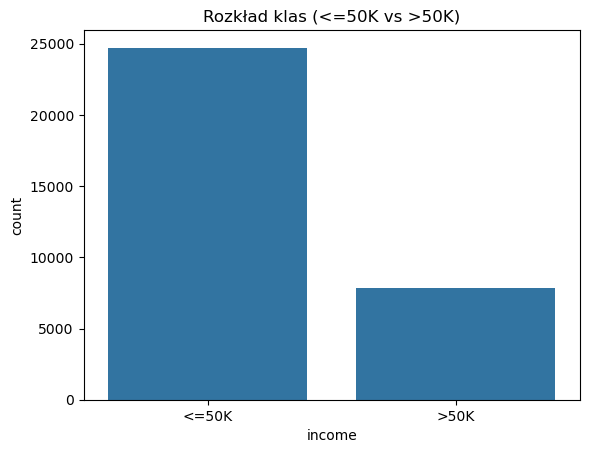

In [4]:
df = df.replace("?", np.nan)

# ile braków na kolumnę
df.isna().sum()

sns.countplot(x="income", data=df)
plt.title("Rozkład klas (<=50K vs >50K)")
plt.show()


In [5]:
# imputacja modą
df = df.replace("?", np.nan)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
X = df.drop(columns=["income"])
y = df["income"]

In [7]:
# podział na train/test i standaryzacja
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
# kolumny numeryczne vs kategoryczne
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(include="object").columns

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [9]:
#def 3 pipelinów
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "kNN": KNeighborsClassifier()
}

pipelines = {
    name: Pipeline(steps=[
        ("preprocess", preprocessor),
        ("clf", model)
    ])
    for name, model in models.items()
}


=== LogReg ===
Accuracy: 0.8558268079226163
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



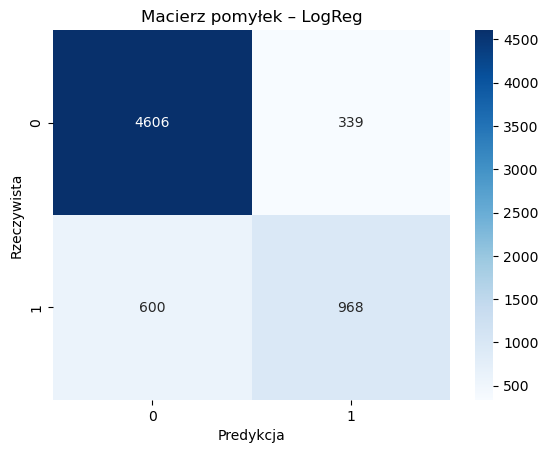


=== SVM ===
Accuracy: 0.8596652848149854
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4945
        >50K       0.77      0.60      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



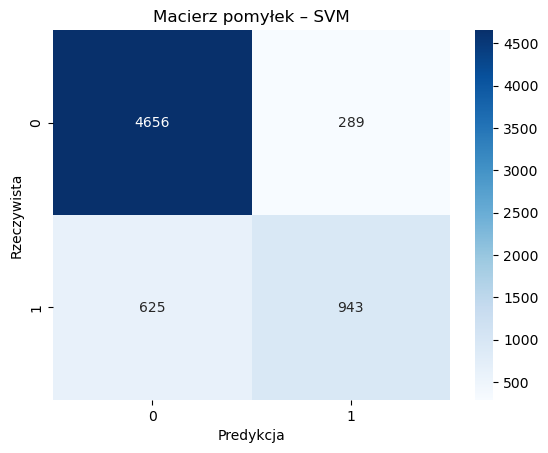


=== kNN ===
Accuracy: 0.8366344234607708
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4945
        >50K       0.68      0.61      0.64      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.83      6513



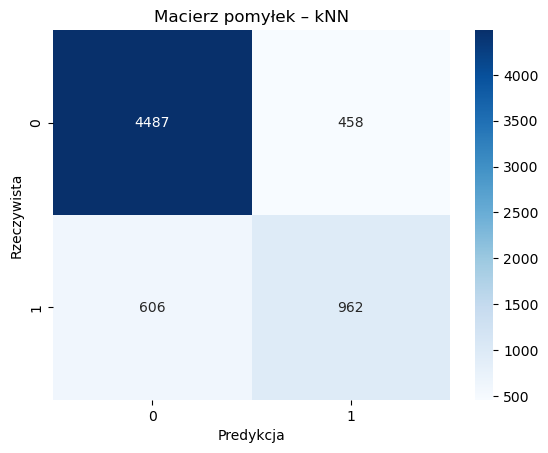

In [10]:
results = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Macierz pomyłek – {name}")
    plt.xlabel("Predykcja"); plt.ylabel("Rzeczywista")
    plt.show()

    results[name] = acc

In [11]:
# Grid Search – optymalizacja hiperparametrów
param_grid = {
    "LogReg": {
        "clf__C": [0.1, 1.0, 10.0],
        "clf__penalty": ["l2"],   # dla solvera 'lbfgs'
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["rbf", "linear"]
    },
    "kNN": {
        "clf__n_neighbors": [3, 5, 11],
        "clf__weights": ["uniform", "distance"]
    }
}

best_models = {}

for name, pipe in pipelines.items():
    grid = GridSearchCV(
        pipe,
        param_grid[name],
        cv=3,
        n_jobs=-1,
        scoring="accuracy"
    )
    grid.fit(X_train, y_train)
    print(f"\n>>> {name} – najlepsze parametry:", grid.best_params_)
    print("Najlepsza dokładność (cv):", grid.best_score_)
    best_models[name] = grid.best_estimator_



>>> LogReg – najlepsze parametry: {'clf__C': 1.0, 'clf__penalty': 'l2'}
Najlepsza dokładność (cv): 0.849124511140289

>>> SVM – najlepsze parametry: {'clf__C': 1, 'clf__kernel': 'rbf'}
Najlepsza dokładność (cv): 0.8542689455359805

>>> kNN – najlepsze parametry: {'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
Najlepsza dokładność (cv): 0.8367629488942963


In [12]:
#pca redukcja wymiarowości
pca = PCA(n_components=2)

pca_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("pca", pca),
    ("clf", LogisticRegression(max_iter=1000))
])

pca_pipeline.fit(X_train, y_train)
y_pred_pca = pca_pipeline.predict(X_test)
print("Accuracy z PCA:", accuracy_score(y_test, y_pred_pca))


Accuracy z PCA: 0.8177491171503147


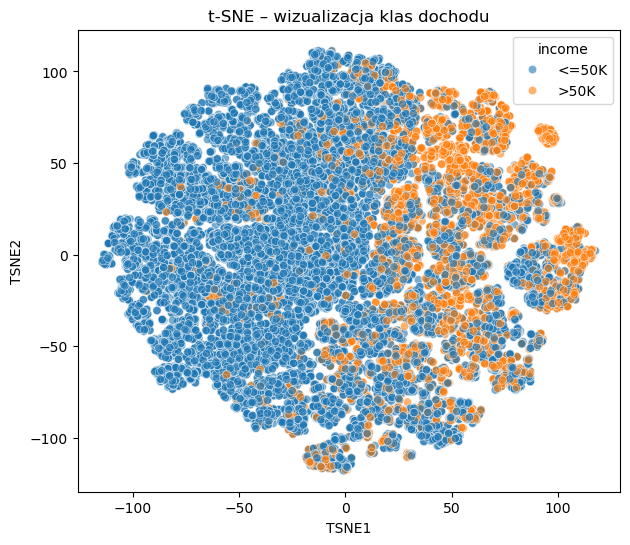

In [13]:
# tsne wizualizacja
X_transformed = preprocessor.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=20)
X_tsne = tsne.fit_transform(X_transformed)

tsne_df = pd.DataFrame({
    "TSNE1": X_tsne[:, 0],
    "TSNE2": X_tsne[:, 1],
    "income": y.values
})

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=tsne_df,
    x="TSNE1", y="TSNE2",
    hue="income",
    alpha=0.6
)
plt.title("t-SNE – wizualizacja klas dochodu")
plt.show()
